In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [3]:
iteration = 100
lr = 0.04
# remember that we generate x by running: torch.tensor([1, 2, 3, 4],dtype = torch.float32)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [4]:
print(X.shape)
n_samples, n_features = X.shape

torch.Size([100, 1])


In [5]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [6]:
l = nn.MSELoss()
optmizer = torch.optim.SGD(model.parameters(), lr = lr)

In [7]:
for i in range(iteration):

    #forward
    y_pred = model(X)

    #loss
    loss = l(y_pred,y)

    #backward / gradient 
    loss.backward()

    # updating weights, at first we used : ww -= grd*lr
    optmizer.step()
    
    #zero grad
    optmizer.zero_grad()
    
    if(i % 10 == 0):
        print(f'Iter: {i} ------  Loss: {loss.item():.5f}')



Iter: 0 ------  Loss: 5586.02832
Iter: 10 ------  Loss: 1385.38318
Iter: 20 ------  Loss: 517.44666
Iter: 30 ------  Loss: 337.47598
Iter: 40 ------  Loss: 300.03772
Iter: 50 ------  Loss: 292.22711
Iter: 60 ------  Loss: 290.59338
Iter: 70 ------  Loss: 290.25085
Iter: 80 ------  Loss: 290.17889
Iter: 90 ------  Loss: 290.16379


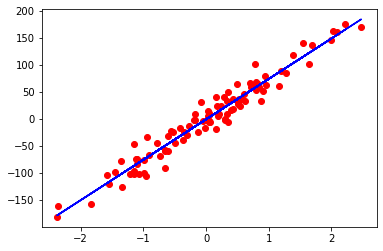

In [8]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()